In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import io
import os
import pyarrow.parquet as pq
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Loading data

In [4]:
script_dir = os.path.dirname('__file__') #<-- absolute dir the script is in
rel_path = "OTA_HotelProductNotifRQ/"
abs_file_path = os.path.join(script_dir, rel_path)
dataset = pq.ParquetDataset(abs_file_path)
table = dataset.read()

In [5]:
product = table.to_pandas()
product

,HotelProductNotifRQMessage
0,[{'MessageMeta': {'X-Correlation-ID': '377d564...
1,[{'MessageMeta': {'X-Correlation-ID': 'b6e5a99...


In [6]:
product.iloc[0]

HotelProductNotifRQMessage    [{'MessageMeta': {'X-Correlation-ID': '377d564...
Name: 0, dtype: object

# Splliting data

In [7]:
def explode_and_split(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    return pd.DataFrame(list(unnested[column]))

In [8]:
HotelProductNotifRQ_Messages_splited = explode_and_split(product, "HotelProductNotifRQMessage")
HotelProductNotifRQ_Messages_splited

,MessageMeta,OTA_HotelProductNotifRQ
0,{'X-Correlation-ID': '377d5648-622b-4e04-a248-...,"{'HotelProducts': {'HotelCode': 'GRT122050', '..."
1,{'X-Correlation-ID': '25ddc6a7-9500-4562-920c-...,"{'HotelProducts': {'HotelCode': 'GRT002988', '..."
2,{'X-Correlation-ID': '59d1fefc-f493-49ba-87a3-...,"{'HotelProducts': {'HotelCode': 'GRT003886', '..."
3,{'X-Correlation-ID': '61474731-acf2-4a2f-ac0f-...,"{'HotelProducts': {'HotelCode': 'GRT003144', '..."
4,{'X-Correlation-ID': '83be1461-8dd6-43e7-916b-...,"{'HotelProducts': {'HotelCode': 'GRT121661', '..."
...,...,...
15005,{'X-Correlation-ID': 'a490f964-3b7a-4476-b448-...,"{'HotelProducts': {'HotelCode': 'GRT002629', '..."
15006,{'X-Correlation-ID': '76d0a906-7c9c-4be2-9da4-...,"{'HotelProducts': {'HotelCode': 'GRT121939', '..."
15007,{'X-Correlation-ID': 'e077e3b5-c078-490a-837c-...,"{'HotelProducts': {'HotelCode': 'GRT003908', '..."
15008,{'X-Correlation-ID': '23b5bff4-88e5-4ff8-bcc9-...,"{'HotelProducts': {'HotelCode': 'GRT120515', '..."


In [9]:
OTA_HotelProductNotifRQ = pd.DataFrame(list(HotelProductNotifRQ_Messages_splited["OTA_HotelProductNotifRQ"]))
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.drop(columns=["OTA_HotelProductNotifRQ"])
HotelProductNotifRQ_Messages_splited = pd.DataFrame(list(HotelProductNotifRQ_Messages_splited["MessageMeta"]))
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.merge(OTA_HotelProductNotifRQ, left_index=True, right_index=True)
HotelProductNotifRQ_Messages_splited

,X-Correlation-ID,Type,AppId,HotelProducts
0,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT122050', 'HotelName': '', 'C..."
1,25ddc6a7-9500-4562-920c-d52a4ea377b8,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT002988', 'HotelName': '', 'C..."
2,59d1fefc-f493-49ba-87a3-70ffb87d87ef,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT003886', 'HotelName': '', 'C..."
3,61474731-acf2-4a2f-ac0f-63ff682f342e,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT003144', 'HotelName': '', 'C..."
4,83be1461-8dd6-43e7-916b-0af37b434401,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT121661', 'HotelName': '', 'C..."
...,...,...,...,...
15005,a490f964-3b7a-4476-b448-e1c972ca951f,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT002629', 'HotelName': '', 'C..."
15006,76d0a906-7c9c-4be2-9da4-088bb48796fc,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT121939', 'HotelName': '', 'C..."
15007,e077e3b5-c078-490a-837c-261e56320f1c,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT003908', 'HotelName': '', 'C..."
15008,23b5bff4-88e5-4ff8-bcc9-a62d222883d8,OTA_HotelProductNotifRQ,shiji,"{'HotelCode': 'GRT120515', 'HotelName': '', 'C..."


In [10]:
def split_and_merge(dataframe: pd.DataFrame, column: str):
    splited = pd.DataFrame(list(dataframe[column]))
    merged = dataframe.merge(splited, left_index=True, right_index=True)
    return merged.drop(columns=[column])

In [11]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "HotelProducts")

In [12]:
def explode_split_and_merge(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    splited = pd.DataFrame(list(unnested[column]))
    merged = splited.merge(unnested, left_index=True, right_index=True)
    return merged.drop(columns=[column])

In [13]:
HotelProductNotifRQ_Messages_splited

,X-Correlation-ID,Type,AppId,HotelCode,HotelName,ChainCode,HotelProduct
0,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,GRT122050,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
1,25ddc6a7-9500-4562-920c-d52a4ea377b8,OTA_HotelProductNotifRQ,shiji,GRT002988,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
2,59d1fefc-f493-49ba-87a3-70ffb87d87ef,OTA_HotelProductNotifRQ,shiji,GRT003886,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
3,61474731-acf2-4a2f-ac0f-63ff682f342e,OTA_HotelProductNotifRQ,shiji,GRT003144,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
4,83be1461-8dd6-43e7-916b-0af37b434401,OTA_HotelProductNotifRQ,shiji,GRT121661,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
...,...,...,...,...,...,...,...
15005,a490f964-3b7a-4476-b448-e1c972ca951f,OTA_HotelProductNotifRQ,shiji,GRT002629,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
15006,76d0a906-7c9c-4be2-9da4-088bb48796fc,OTA_HotelProductNotifRQ,shiji,GRT121939,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
15007,e077e3b5-c078-490a-837c-261e56320f1c,OTA_HotelProductNotifRQ,shiji,GRT003908,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."
15008,23b5bff4-88e5-4ff8-bcc9-a62d222883d8,OTA_HotelProductNotifRQ,shiji,GRT120515,,GRT,"[{'ProductNotifType': '', 'ProductStatusType':..."


In [14]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "HotelProduct")

In [15]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "RoomTypes")

In [16]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "RoomType")

In [17]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "RatePlans")

In [18]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "RatePlan")

In [19]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "SellDateRange")

In [20]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "StayDateRange")

In [21]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "PolicyInfo")

In [22]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "BookingRules")

In [23]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "BookingRule")

In [24]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "RestrictionStatus")

In [25]:
RestrictionStatus_no_none = []
for v in HotelProductNotifRQ_Messages_splited.iloc[:, 0]:
    if v is not None:
        RestrictionStatus_no_none.append(v)
    else:
        RestrictionStatus_no_none.append({'RestrictionStatus': np.array([{'Restriction': None, 'Status': None, 'MinAdvancedBookingOffset': None, 'MaxAdvancedBookingOffset': None}],
        dtype=object)})

In [26]:
RestrictionStatus_no_none = pd.DataFrame(RestrictionStatus_no_none)
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.merge(RestrictionStatus_no_none, left_index=True, right_index=True)

In [27]:
HotelProductNotifRQ_Messages_splited.drop(HotelProductNotifRQ_Messages_splited.columns[0],axis=1,inplace=True)
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.drop(columns=["RestrictionStatus"])

In [28]:
LengthsOfStay_no_none = []
for v in HotelProductNotifRQ_Messages_splited["LengthsOfStay"]:
    if v is not None:
        LengthsOfStay_no_none.append(v)
    else:
        LengthsOfStay_no_none.append({'LengthOfStay': np.array([{'MinMaxMessageType': None, 'Time': None, 'TimeUnit': None, 'MinLOS': None, 'MaxLOS': None},
         {'MinMaxMessageType': None, 'Time': None, 'TimeUnit': None, 'MinLOS': None, 'MaxLOS': None}],
        dtype=object)})

In [29]:
LengthsOfStay_no_none = pd.DataFrame(LengthsOfStay_no_none)
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.merge(LengthsOfStay_no_none, left_index=True, right_index=True)
HotelProductNotifRQ_Messages_splited = HotelProductNotifRQ_Messages_splited.drop(columns=["LengthsOfStay"])

In [30]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "LengthOfStay")

In [31]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "CancelPolicy")

In [32]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "CancelPenalty")

In [33]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "Deadline")

In [34]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "AmountPercent")

In [35]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "PenaltyDescription")

In [36]:
HotelProductNotifRQ_Messages_splited = split_and_merge(HotelProductNotifRQ_Messages_splited, "GuaranteePaymentPolicy")

In [37]:
HotelProductNotifRQ_Messages_splited = explode_split_and_merge(HotelProductNotifRQ_Messages_splited, "GuaranteePayment")
HotelProductNotifRQ_Messages_splited

,GuaranteeType,PaymentCode,Text,Start_x,End_x,NonRefundable,Mon,Tue,Weds,Thur,Fri,Sat,Sun,MinMaxMessageType,Time,TimeUnit,MinLOS,MaxLOS,Start_y,End_y,DOWRestrictions,DOW_Restrictions,MinAdvancedBookingOffset_x,MaxAdvancedBookingOffset_x,OriginalData,RatePlanCode,RatePlanName,RatePlanType,CurrencyCode_x,BaseOccupancy,Descriptions_x,RoomTypeCode,RoomTypeName,MaxOccupancy,MaxAdultOccupancy,MaxChildOccupancy,Descriptions_y,ProductNotifType,ProductStatusType,Contacts,Taxes,TPA_Extensions,X-Correlation-ID,Type,AppId,HotelCode,HotelName,ChainCode,StartSell,EndSell,Duration,StartStay,EndStay,InventoryInfo,Restriction,Status,MinAdvancedBookingOffset_y,MaxAdvancedBookingOffset_y,CancelPolicyIndicator,OffsetDropTime,OffsetTimeUnit,OffsetUnitMultiplier,AbsoluteDeadline,TaxInclusive,FeesInclusive,Percent,BasisType,Amount,NmbrOfNights,DecimalPlaces,CurrencyCode_y
0,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MinLOS,1,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,2,Twin Room,2,,,None,,Active,None,None,,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,GRT122050,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeArrival,Hour,18,None,None,None,None,Nights,None,1,None,None
0,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MinLOS,1,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,2,Twin Room,2,,,None,,Active,None,None,,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,GRT122050,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeArrival,Hour,18,None,None,None,None,Nights,None,1,None,None
0,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MinLOS,1,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,2,Twin Room,2,,,None,,Active,None,None,,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,GRT122050,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeArrival,Hour,18,None,None,None,None,Nights,None,1,None,None
0,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MinLOS,1,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,2,Twin Room,2,,,None,,Active,None,None,,377d5648-622b-4e04-a248-f665359213e1,OTA_HotelProductNotifRQ,shiji,GRT122050,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeArrival,Hour,18,None,None,None,None,Nights,None,1,None,None
1,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MaxLOS,90,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,1,Single Room,2,,,None,,Active,None,None,,25ddc6a7-9500-4562-920c-d52a4ea377b8,OTA_HotelProductNotifRQ,shiji,GRT002988,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeArrival,Hour,18,None,None,None,None,Nights,None,1,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,GuaranteeRequired,PREPAY,"Free cancel before 18:00 arrival day, else cha...",None,None,None,None,None,None,None,None,None,None,MinLOS,1,None,None,None,None,None,None,None,None,None,,WHL10,BAR rate,None,None,None,None,14,Housing heart prevention and control room,2,,,None,,Active,None,None,,23b5bff4-88e5-4ff8-bcc9-a62d222883d8,OTA_HotelProductNotifRQ,shiji,GRT120515,,GRT,2021-11-17,2029-12-31,None,2021-11-17,2029-12-31,None,NaN,NaN,NaN,NaN,,BeforeAr

# Data analysis

The `OTA_HotelProductNotifRQ` may be used to send a notification of one or more new hotel products. This message may also be used to modify or cancel one or more existing hotel products.
A product may be a room type, a rate plan, a room type rate plan combination or hotel policy information. This may be used for sending products at multiple hotels or multiple products at a single hotel.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [39]:
HotelProductNotifRQ_Messages_splited['AppId'].value_counts()

shiji    60040
Name: AppId, dtype: int64

In [40]:
HotelProductNotifRQ_Messages_splited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60040 entries, 0 to 15009
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GuaranteeType               60040 non-null  object 
 1   PaymentCode                 60040 non-null  object 
 2   Text                        60040 non-null  object 
 3   Start_x                     0 non-null      object 
 4   End_x                       0 non-null      object 
 5   NonRefundable               0 non-null      object 
 6   Mon                         0 non-null      object 
 7   Tue                         0 non-null      object 
 8   Weds                        0 non-null      object 
 9   Thur                        0 non-null      object 
 10  Fri                         0 non-null      object 
 11  Sat                         0 non-null      object 
 12  Sun                         0 non-null      object 
 13  MinMaxMessageType           300

In [41]:
font = {'family' : 'sans serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## HotelCode

In [42]:
HotelProductNotifRQ_Messages_splited['HotelCode'].value_counts().head(30)

GRT003014    148
GRT003311    136
GRT122078    128
GRT002589    128
GRT120228    128
GRT122283    120
GRT003928    120
GRT120896    120
GRT130002    116
GRT121465    112
GRT002697    112
GRT300254    112
GRT003598    112
GRT121794    112
GRT002650    104
GRT171801    104
GRT121985    104
GRT121665     96
GRT002807     96
GRT121532     96
GRT120701     96
GRT003134     96
GRT122175     96
GRT121499     96
GRT121736     96
GRT121537     96
GRT120547     96
GRT122536     96
GRT121440     96
GRT120339     96
Name: HotelCode, dtype: int64

## ChainCode

In [43]:
HotelProductNotifRQ_Messages_splited['ChainCode'].value_counts()

GRT    60040
Name: ChainCode, dtype: int64

## Number of hotels in msgs

In [44]:
HotelProductNotifRQ_Messages_splited['HotelCode'].nunique()

986

## RoomTypeCode

In [45]:
HotelProductNotifRQ_Messages_splited['RoomTypeCode'].nunique()

51

In [46]:
HotelProductNotifRQ_Messages_splited[['RoomTypeCode', 'RoomTypeName']].value_counts().head(30)

RoomTypeCode  RoomTypeName      
1             King Room             1776
2             King Room             1176
              Twin Room              820
1             大床房                    788
3             Twin Room              696
2             双床房                    660
3             双床房                    552
              King Room              552
              Premier Room           484
2             大床房                    472
1             Twin Room              412
4             Premier Room           404
              Twin Room              396
7             Family Room            392
3             高级大床房                  392
6             Family Room            384
3             Business King Room     384
4             Premier Twin Room      380
              Business King Room     380
              Business Twin Room     372
5             Premier Room           364
              Family Room            360
4             高级双床房                  336
2             Premier Ro

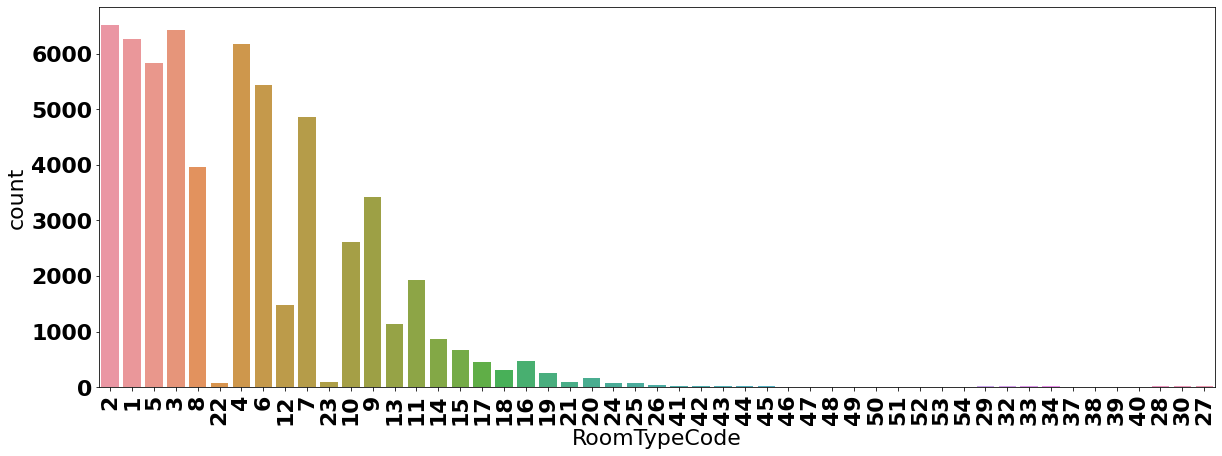

In [47]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="RoomTypeCode", data=HotelProductNotifRQ_Messages_splited)
ax = plt.xticks(rotation=90)

## NmbrOfNights

In [48]:
HotelProductNotifRQ_Messages_splited['NmbrOfNights'].value_counts()

1    60040
Name: NmbrOfNights, dtype: int64

## StartStay

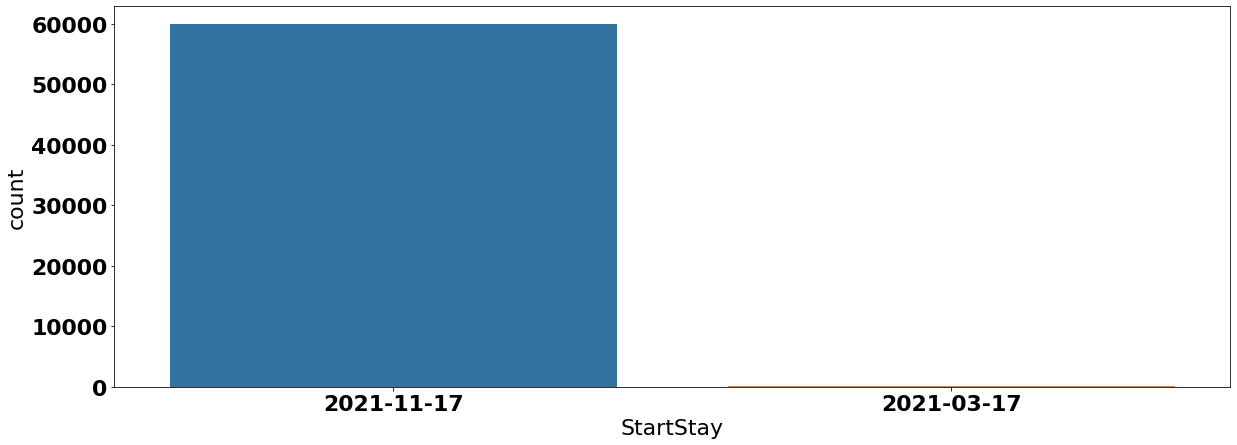

In [49]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="StartStay", data=HotelProductNotifRQ_Messages_splited)

## Rate plans

In [50]:
HotelProductNotifRQ_Messages_splited['RatePlanCode'].value_counts()

WHL10    60040
Name: RatePlanCode, dtype: int64

## MaxOccupancy

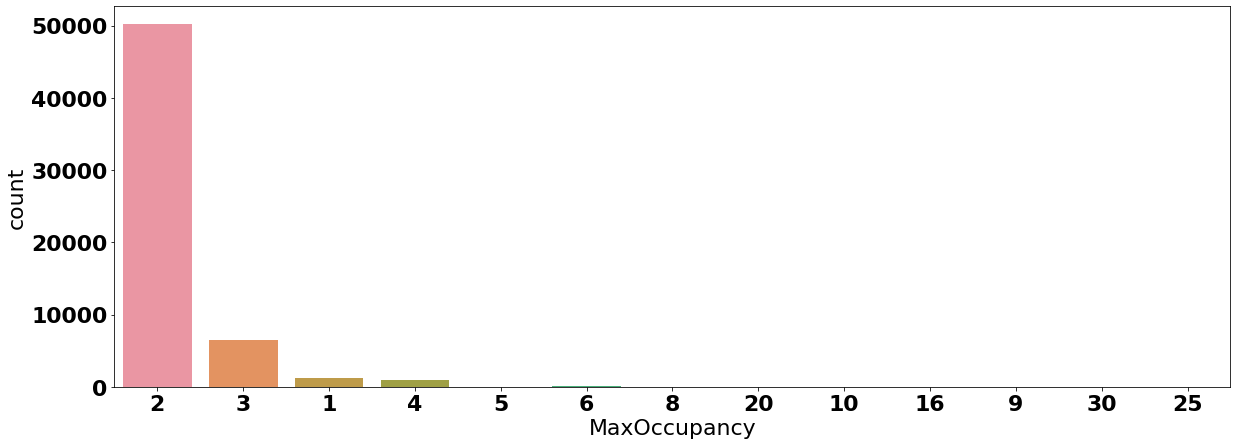

In [51]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="MaxOccupancy", data=HotelProductNotifRQ_Messages_splited)

## PaymentCode

In [52]:
HotelProductNotifRQ_Messages_splited['PaymentCode'].value_counts()

PREPAY    60040
Name: PaymentCode, dtype: int64

## Time

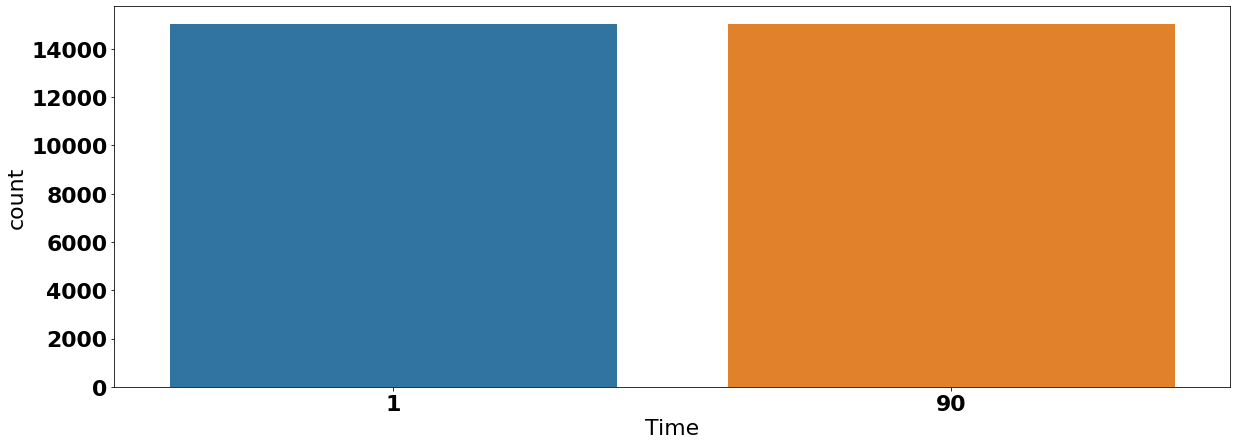

In [53]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="Time", data=HotelProductNotifRQ_Messages_splited)

## OffsetDropTime

In [54]:
HotelProductNotifRQ_Messages_splited['OffsetDropTime'].value_counts()

BeforeArrival    60040
Name: OffsetDropTime, dtype: int64

## Text

In [55]:
HotelProductNotifRQ_Messages_splited['Text'].value_counts()

Free cancel before 18:00 arrival day, else charge 1 night    60040
Name: Text, dtype: int64